## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

In [ ]:
# I acknowledge that I have used AI to the extent permitted by the UVA
# AI acceptable use policy. I acknowlegde that I am aware of the possibility
# of AI producing errors and offensive content and certify that I
# have taken the necessary measures to ensure that the work produced is both
# accurate and ethical to the best of my ability.

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
#1.1
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

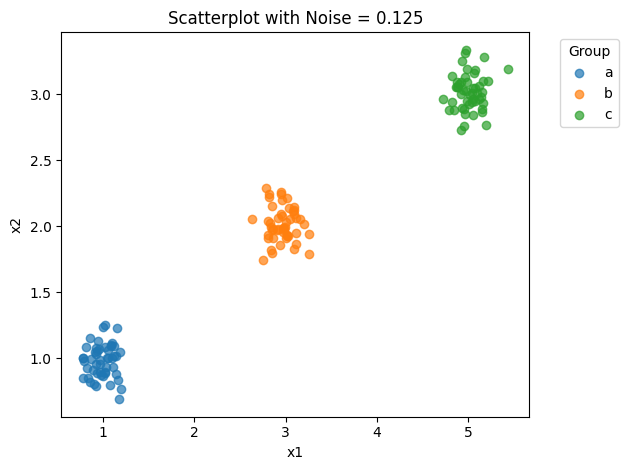

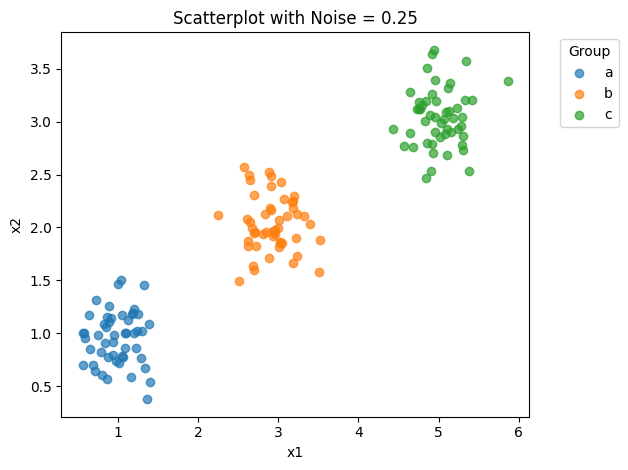

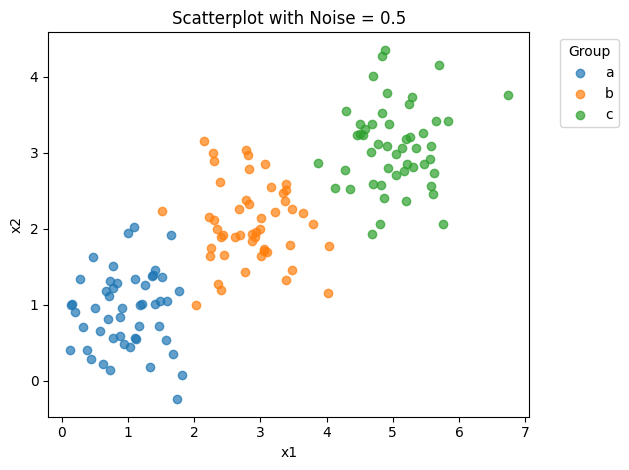

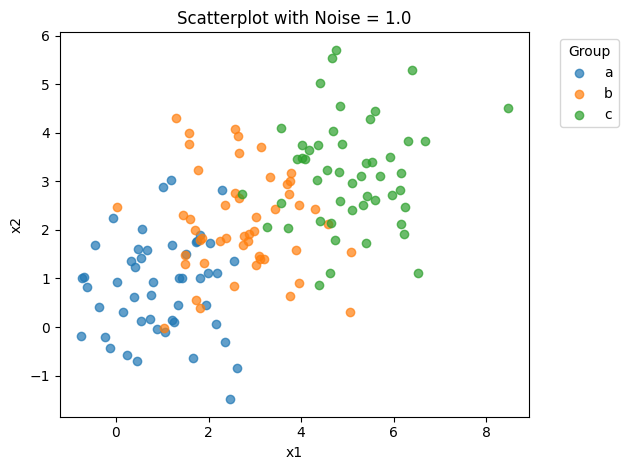

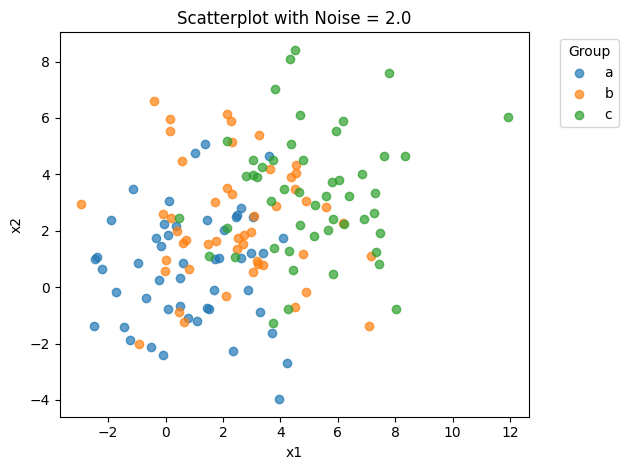

In [3]:
#1.2
import seaborn as sns
import matplotlib.pyplot as plt



def plot_scatter(df, title):
    groups = df.groupby('group')
    for name, group in groups:
        plt.scatter(group.x1, group.x2, label=name, alpha=0.7)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_scatter(df0_125, "Scatterplot with Noise = 0.125")
plot_scatter(df0_25,  "Scatterplot with Noise = 0.25")
plot_scatter(df0_5,   "Scatterplot with Noise = 0.5")
plot_scatter(df1_0,   "Scatterplot with Noise = 1.0")
plot_scatter(df2_0,   "Scatterplot with Noise = 2.0")




Question 1.2

As the noise increases, the individual clusters begin to "open up" and become less visually concentrated around each other, and coloring each group allows us to see these changes more clearly. In the graph for noise=0.125 (lowest), we see that each group is tightly bunched together with no overlap of data points between group. For noise=2 (highest), we see an almost complete dispersion and overlap of data points between group with very little organization of each group from the others.


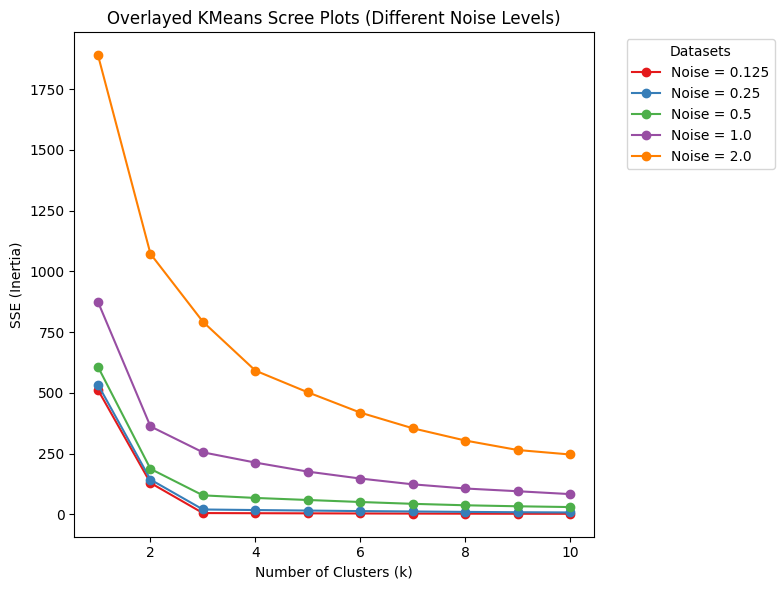

In [7]:
#1.3

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

datasets = {
    "Noise = 0.125": df0_125,
    "Noise = 0.25":  df0_25,
    "Noise = 0.5":   df0_5,
    "Noise = 1.0":   df1_0,
    "Noise = 2.0":   df2_0
}

colors = sns.color_palette("Set1", n_colors=len(datasets))

plt.figure(figsize=(8,6))
k_bar = 10

for (title, df), color in zip(datasets.items(), colors):
    X = df.drop("group", axis=1).values

    SSE = []
    for k in range(1, k_bar + 1):
        model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
        model.fit(X)
        SSE.append(model.inertia_)

    plt.plot(range(1, k_bar + 1), SSE, marker="o", label=title, color=color)

plt.title("Overlayed KMeans Scree Plots (Different Noise Levels)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.legend(title="Datasets", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




1.3

As expected, we can see thagt the plot with the highest noise has the greatest SSE. The higher SSE plots receive more marginal utility for each additional cluster because of the increased noise. They also don't have as clear of an elbow, making it harder to select a k. So, each additional cluster generally in a higher-noise plot has greater benefit than adding another cluster to a curve with lower starting SSE and a more evident "elbow."

With these lower noise/SSE curves we can see clearer "elbows," meaning that these curves have a definitive optimal cluster amount. After this elbow, adding additional clusters generally yields less benefit to our data than in higher-noise/SSE plots. For plots with stronger elbows and lower SSE, there is practically no added benefit of additional clusters past the elbow, and so it is easier to select a k. For instance, the plot for noise=0.125 essentially flatlines after 3 clusters. So, 3 clusters is the optimal number for this plot.

1.4

The "intuition" of the elbow basically tells us that each plot will eventually have an ideal number of clusters, despite the SSE or noise. It just means that the number of clusters for each plot, depending on the noise and SSE, will vary in how easily we can select this. This is because, as the simulation above shows us, plots with greater SSE and noise will have a more gradual "descent" in reaching its optimal k because of the greater average distance of the points to the core's center. Take the plot with noise=2, for instance. There isn't as clear an elbow as there is in other plots with less noise (eg. noise=0.125 or noise=0.5). So, each additional cluster will have more added benefit to a plot like noise=2.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [17]:
# 2.1
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import pandas as pd

election = pd.read_csv("2022 election cycle fundraising.csv")

print(election[['Raised', 'Spent', 'Cash on Hand', 'Debts']])

money_cols = ['Raised', 'Spent', 'Cash on Hand', 'Debts']

for col in money_cols:
    election[col] = (
        election[col]
        .astype(str)
        .str.replace(r'[\$, ]', '', regex=True)
        .replace({'': None, 'nan': None})
    )
    election[col] = pd.to_numeric(election[col], errors='coerce')

election[money_cols] = election[money_cols].fillna(0)

print(election[money_cols].dtypes)
print(election[money_cols].head())

# I removed the dollar sign, commas, and any spaces that would've made analysing
# the data difficult.


          Raised        Spent Cash on Hand     Debts
0     $7,719,396   $7,449,678     $851,851        $0
1     $2,192,741   $1,243,502   $2,472,888        $0
2    $20,993,041  $13,957,854  $20,942,888        $0
3     $1,211,111   $1,173,466     $623,472        $0
4     $1,617,611   $1,664,674   $1,098,579        $0
..           ...          ...          ...       ...
532     $892,064     $823,955      $76,799  $391,742
533   $7,900,497   $7,380,035     $928,803   $94,940
534     $684,268     $662,375      $93,513   $49,480
535   $3,777,731   $2,746,661   $1,085,613        $0
536   $1,679,466   $2,103,190     $736,813        $0

[537 rows x 4 columns]
Raised          int64
Spent           int64
Cash on Hand    int64
Debts           int64
dtype: object
     Raised     Spent  Cash on Hand  Debts
0   7719396   7449678        851851      0
1   2192741   1243502       2472888      0
2  20993041  13957854      20942888      0
3   1211111   1173466        623472      0
4   1617611   1664674  

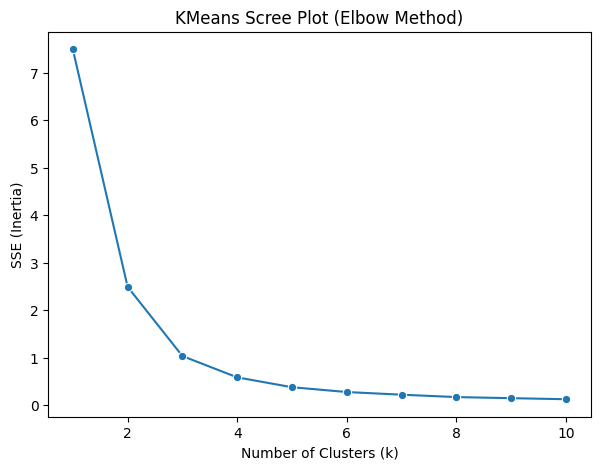

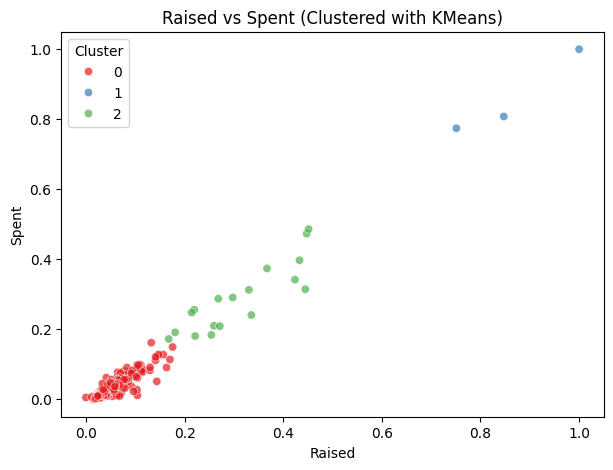

In [19]:
# 2.2 Max-min normalize Raised and Spent. Use a scree plot to determine the optimal
# number of clusters for the  𝑘  means clustering algorithm. Make a scatter plot
# of Raised against Spent and hue the dots by their cluster membership. What do you see?
# Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.

# --- 1. Max-min normalization ---
money_cols = ['Raised', 'Spent']

election_norm = election.copy()
for col in money_cols:
    election_norm[col] = (
        (election_norm[col] - election_norm[col].min()) /
        (election_norm[col].max() - election_norm[col].min())
    )

# --- 2. Scree plot (Elbow method) ---
X = election_norm[money_cols].values
k_bar = 10
SSE = []

for k in range(1, k_bar+1):
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X)
    SSE.append(model.inertia_)

plt.figure(figsize=(7,5))
sns.lineplot(x=range(1, k_bar+1), y=SSE, marker="o")
plt.title("KMeans Scree Plot (Elbow Method)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.show()

# --- 3. Cluster with chosen k (say k=3 for example) ---
optimal_k = 3  # you should pick this based on the elbow
kmeans = KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, random_state=0)
election_norm['Cluster'] = kmeans.fit_predict(X)

# --- 4. Scatter plot of Raised vs Spent by cluster ---
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=election_norm,
    x="Raised",
    y="Spent",
    hue="Cluster",
    palette="Set1",
    alpha=0.7
)
plt.title("Raised vs Spent (Clustered with KMeans)")
plt.show()


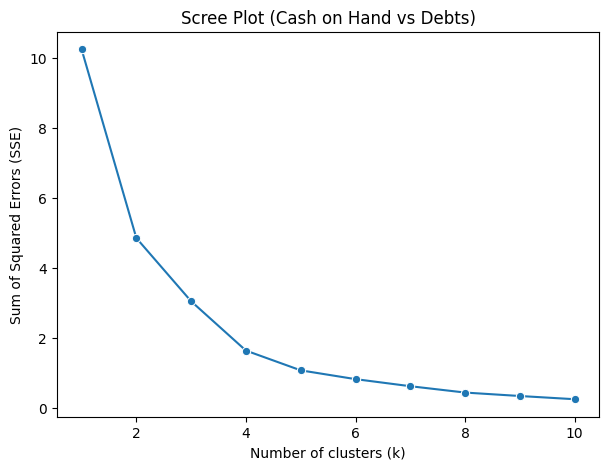

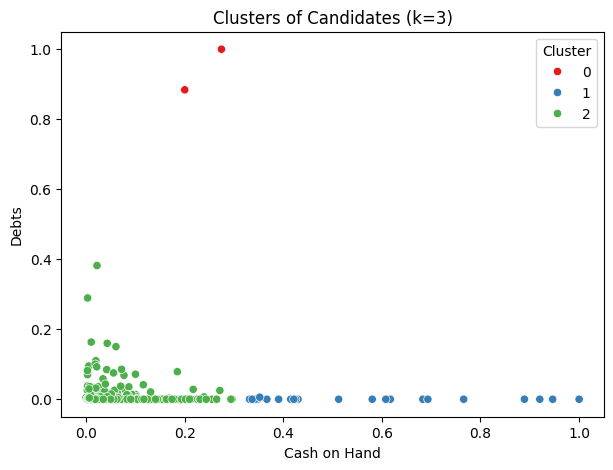

In [20]:
# 2.3 Repeat part 2, but for Cash on Hand and Debts.
# Compare your results with part 2. Why might this be?
# If necessary, look up some of these races to see how close they were.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def maxmin(x):
    return (x - x.min()) / (x.max() - x.min())

money_cols2 = ['Cash on Hand', 'Debts']
X = election[money_cols2].copy()

X_norm = X.apply(maxmin)

k_bar = 10
SSE = []
for k in range(1, k_bar + 1):
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X_norm)
    SSE.append(model.inertia_)

plt.figure(figsize=(7,5))
sns.lineplot(x=np.arange(1, k_bar+1), y=SSE, marker="o")
plt.title("Scree Plot (Cash on Hand vs Debts)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()

optimal_k =
kmeans = KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, random_state=0)
X_norm['Cluster'] = kmeans.fit_predict(X_norm)

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=X_norm,
    x='Cash on Hand', y='Debts',
    hue='Cluster', palette='Set1'
)
plt.title(f"Clusters of Candidates (k={optimal_k})")
plt.show()


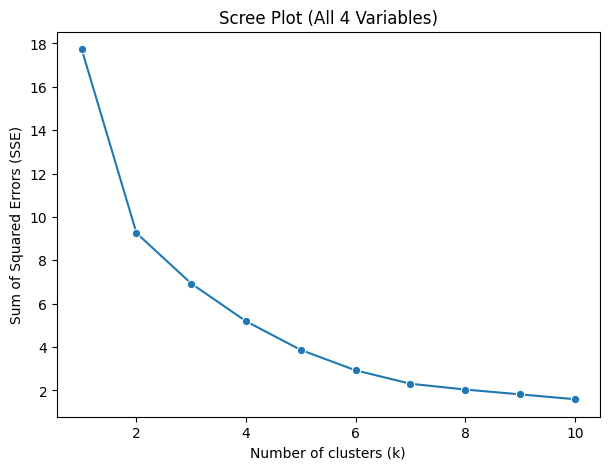

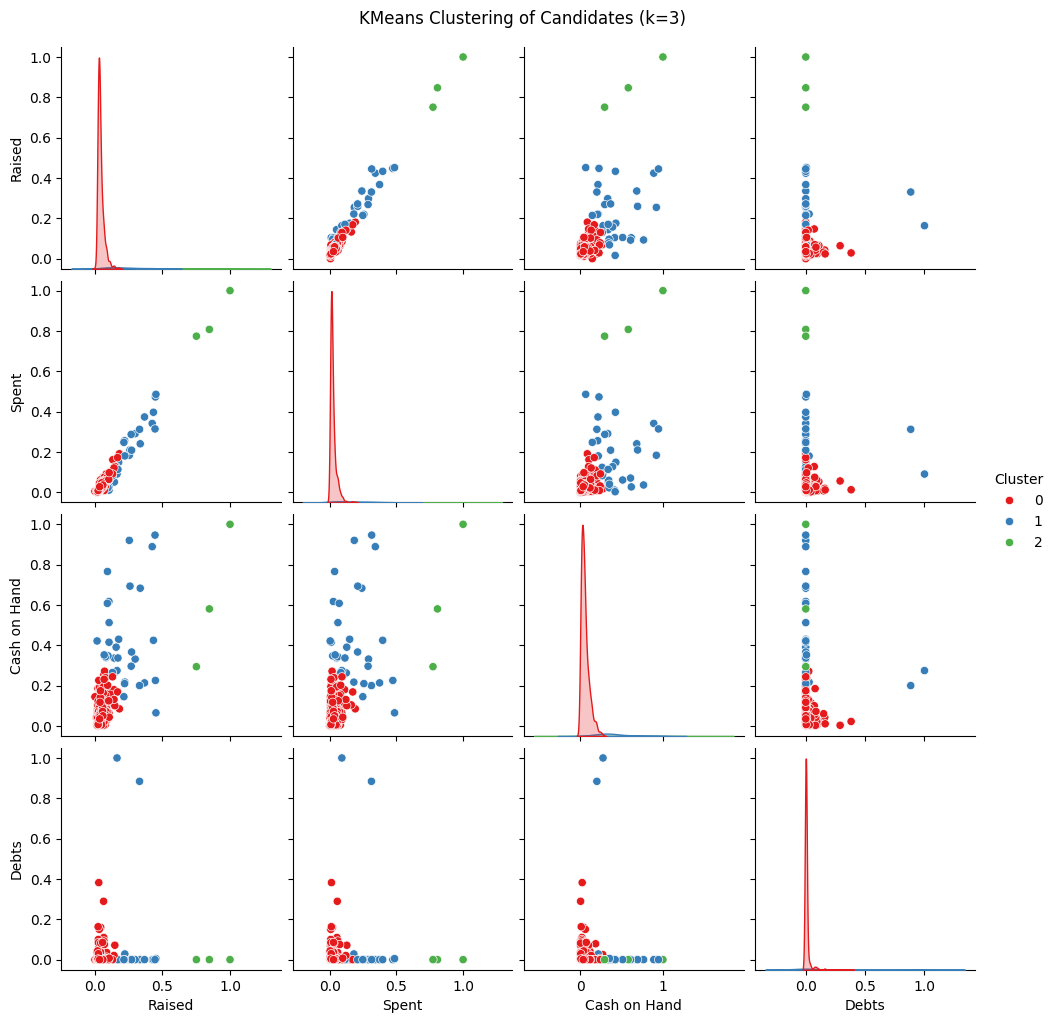

In [21]:
# 2.4 Use  𝑘  means clustering with all four numeric variables. How do your
# results compare to the previous two parts?

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def maxmin(x):
    return (x - x.min()) / (x.max() - x.min())

money_cols = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
X = election[money_cols].copy()

X_norm = X.apply(maxmin)

k_bar = 10
SSE = []
for k in range(1, k_bar + 1):
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X_norm)
    SSE.append(model.inertia_)

plt.figure(figsize=(7,5))
sns.lineplot(x=np.arange(1, k_bar+1), y=SSE, marker="o")
plt.title("Scree Plot (All 4 Variables)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()

optimal_k =
kmeans = KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_norm)
X_norm['Cluster'] = clusters

sns.pairplot(X_norm, vars=money_cols, hue="Cluster", palette="Set1", diag_kind="kde")
plt.suptitle(f"KMeans Clustering of Candidates (k={optimal_k})", y=1.02)
plt.show()
o

In [ ]:
# 2.5 Did the  𝑘 -MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?

In [ ]:
# -- Don't do --